In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
pd.options.display.max_columns=100
pd.options.display.max_rows=1000
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the given Train Data
Train_data="/content/gdrive/MyDrive/Credit_Card_Fraud_Capstone/fraudTrain.csv"
#Reading the given Test Data
Test_data="/content/gdrive/MyDrive/Credit_Card_Fraud_Capstone/fraudTest.csv"


In [4]:
#Creating train data frame
train=pd.read_csv(Train_data)

In [5]:
#Creating test data frame
test=pd.read_csv(Test_data)

In [6]:
#To display first 5 rows of given Train dataset
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [7]:
#Dropping First column from Train dataset
train=train.drop(train.columns[0],axis=1)
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [8]:
#To display first 5 rows of Test dataset
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [9]:
#Dropping first column from Test data set
test=test.drop(test.columns[0],axis=1)
test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [10]:
#To check the Size of Train dataset in terms of rows and columns
train.shape

(1296675, 22)

In [11]:
#To check the Size of Test dataset in terms of rows and columns
test.shape

(555719, 22)

In [12]:
#Combining both train and test datasets as single dataframe
df=pd.concat([train,test])
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [13]:
#To check the Size of Dataframe in terms of rows and columns
df.shape

(1852394, 22)

In [14]:
#To check the Data types of each Column in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int6

In [15]:
#To check for any Null values present in dataset
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Observation:
1. No null values were present in dataframe


In [16]:
#To check the Distribution of Target variable in Dataset
df['is_fraud'].value_counts(normalize=True)

0    0.99479
1    0.00521
Name: is_fraud, dtype: float64

Observation: 
1. This is highly Imabalanced class data set where in we have around 99% of sample data with Non-Fraud transactions  and less than 1% of sample data for fraud transactions.
2. We need to make Data set Balanaced before  creating the model to obtain correct results.


In [17]:
#To find the number of distinct values in dataframe for each column
df.nunique()

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

In [18]:
#To convert the transaction date column into Date time format
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])

In [19]:
#To derive the Transaction Hour from Date time column
df['trans_hour']=df['trans_date_trans_time'].dt.hour
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0


In [20]:
#To derive the Transaction Weekday from Date time column
df['day_of_week']=df['trans_date_trans_time'].dt.day_name()
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday


In [21]:
#To derive the Transaction year month from Date time column
df['year_month']=df['trans_date_trans_time'].dt.to_period('M')
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01


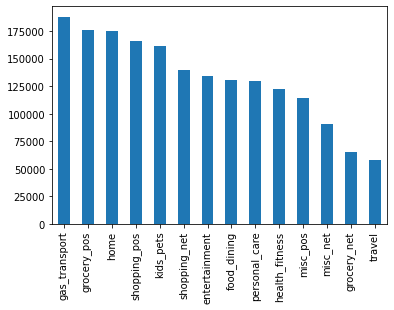

In [22]:
#To plot Bar chart for categroy distribution
df['category'].value_counts().plot.bar()
plt.show()

Observation:
1. Gas_Transport category have the highest nuumber of overall Transactions, while the least transactions were made for Travel category.

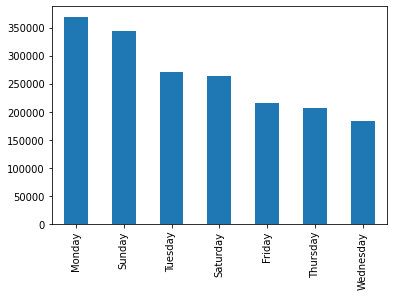

In [23]:
#To plot Bar chart for weekday distribution
df['day_of_week'].value_counts().plot.bar()
plt.show()

Observation:
1. Highest number of overall Transactions were recorded on Monday.
2. Lowest number of overall Transactions were recorded on Wedenesday.

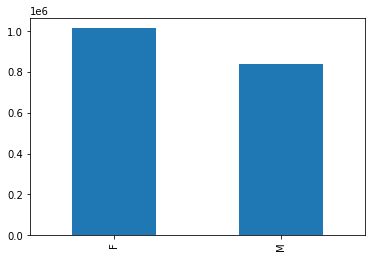

In [24]:
#To plot Bar chart for Gender distribution
df['gender'].value_counts().plot.bar()
plt.show()

Observation:
1. Females have shown a tendency to make more online transactions than Males.


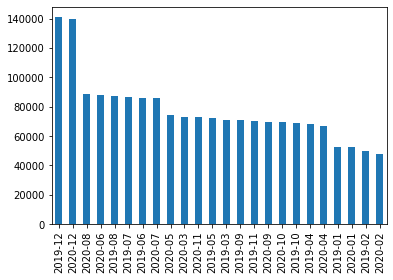

In [25]:

#To plot Bar chart for Year month distribution
df['year_month'].value_counts().plot.bar()
plt.show()


Observation:
1. Customers have made maximum number of transactions in Decemeber month for year 2019 and 2020.
2. Customers have made least number of transactions in February month for year 2020 and 2019.

In [26]:
#To check the Distribution of State variable in Dataset
df['state'].value_counts(normalize=True)

TX    0.073024
NY    0.064467
PA    0.061635
CA    0.043455
OH    0.035968
MI    0.035535
IL    0.033585
FL    0.032809
AL    0.031592
MO    0.029639
MN    0.024527
AR    0.024083
NC    0.023286
VA    0.022542
WI    0.022532
SC    0.022528
KY    0.022123
IN    0.021345
IA    0.020948
OK    0.020541
MD    0.020160
GA    0.020158
WV    0.019720
NJ    0.018965
NE    0.018584
KS    0.017782
MS    0.016207
LA    0.016170
WY    0.014995
WA    0.014597
OR    0.014256
TN    0.013449
ME    0.012650
NM    0.012647
ND    0.011435
CO    0.010671
SD    0.009487
MA    0.009481
VT    0.009076
MT    0.009073
AZ    0.008293
UT    0.008290
NH    0.006331
CT    0.005927
NV    0.004350
ID    0.004338
DC    0.002769
HI    0.001970
AK    0.001600
RI    0.000402
DE    0.000005
Name: state, dtype: float64

Observation:
1. State with code 'TX' have recorded highest number of transactions, while the least  was recoded for State 'DE'
2. Top 3 states with highest number of transactions were 'TX', 'NY' and 'PA'.

In [27]:
#To check the Distribution of Job variable in Dataset
df['job'].value_counts(normalize=True,ascending=False)

Film/video editor                                              0.007503
Exhibition designer                                            0.007108
Surveyor, land/geomatics                                       0.006713
Naval architect                                                0.006712
Materials engineer                                             0.006322
Designer, ceramics/pottery                                     0.006310
Environmental consultant                                       0.005924
Financial adviser                                              0.005918
Systems developer                                              0.005918
IT trainer                                                     0.005907
Copywriter, advertising                                        0.005529
Scientist, audiological                                        0.005525
Chartered public finance accountant                            0.005512
Chief Executive Officer                                        0

Observation:
1. Card customers working in 'Film/video editor' industry have made maximum online transactions, while the least transactions being maded by customers working in 'Armed forces technical officer' , 'Information officer','Engineer,water' ,'Veterinary surgeon','Ship broker','Contracting civil engineer' & 'Warehouse manager'.
2.  Customers in job field who  tend to shop more online are 'Film/video editor', 'Exhibition designer','Surveyor, land/geomatics' & 'Naval architect'.

In [28]:
#To display train data first 5 rows
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [29]:
#To convert Date of birth into date time format
df['dob']=pd.to_datetime(df['dob'])

In [30]:
# To convert age column data into years format
df['age']=np.round((df['trans_date_trans_time']-df['dob'])/np.timedelta64(1,'Y'))
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.0


In [31]:
#To check pre-defined statistical data for column age
df['age'].describe()

count    1.852394e+06
mean     4.626617e+01
std      1.741239e+01
min      1.400000e+01
25%      3.300000e+01
50%      4.400000e+01
75%      5.700000e+01
max      9.600000e+01
Name: age, dtype: float64

Observation:
1. Customer with age between 33 and 57 years are maximum in number and makes around 50% of our customers base.
2. The Eldest customer making transaction was of 96 years, while youngest customer was of 14 years.

In [32]:
#To check for distribution of Transaction Amount

In [33]:
#To display Overall Amount distribution with pre-defined statistical function
df['amt'].describe(percentiles=[0.5,0.95,0.999]).reset_index().rename(columns={'index':'Row Type','amt':'Overall Amount distribution'})

,Row Type,Overall Amount distribution
0,count,1.852394e+06
1,mean,7.006357e+01
2,std,1.592540e+02
3,min,1.000000e+00
4,50%,4.745000e+01
5,95%,1.953400e+02
6,99.9%,1.517241e+03
7,max,2.894890e+04


In [34]:
#To display Non-Fraud Amount distribution with pre-defined statistical function
df.loc[df['is_fraud']==0,['amt']].describe(percentiles=[0.5,0.95,0.999]).reset_index().rename(columns={'index':'Row Type','amt':'Non fraud Amt distribution'})

,Row Type,Non fraud Amt distribution
0,count,1.842743e+06
1,mean,6.765128e+01
2,std,1.535481e+02
3,min,1.000000e+00
4,50%,4.724000e+01
5,95%,1.895900e+02
6,99.9%,1.519623e+03
7,max,2.894890e+04


In [35]:
#To display Fraud Amount distribution with pre-defined statistical function
df.loc[df['is_fraud']==1,['amt']].describe(percentiles=[0.5,0.95,0.999]).reset_index().rename(columns={'index':'Row Type','amt':'Fraud Amt distribution'})

,Row Type,Fraud Amt distribution
0,count,9651.000000
1,mean,530.661412
2,std,391.028873
3,min,1.060000
4,50%,390.000000
5,95%,1084.090000
6,99.9%,1293.127000
7,max,1376.040000


In [36]:
#To combine Amount results into single dataframe
pd.concat([df['amt'].describe(percentiles=[0.5,0.95,0.999]).reset_index().rename(columns={'index':'Row Type','amt':'Overall Amt distribution'}),
df.loc[df['is_fraud']==0,['amt']].describe(percentiles=[0.5,0.95,0.999]).reset_index(drop=1).rename(columns={'index':'Row Type','amt':'Non fraud Amt distribution'}),
df.loc[df['is_fraud']==1,['amt']].describe(percentiles=[0.5,0.95,0.999]).reset_index(drop=1).rename(columns={'index':'Row Type','amt':'Fraud Amt distribution'})],axis=1)

,Row Type,Overall Amt distribution,Non fraud Amt distribution,Fraud Amt distribution
0,count,1.852394e+06,1.842743e+06,9651.000000
1,mean,7.006357e+01,6.765128e+01,530.661412
2,std,1.592540e+02,1.535481e+02,391.028873
3,min,1.000000e+00,1.000000e+00,1.060000
4,50%,4.745000e+01,4.724000e+01,390.000000
5,95%,1.953400e+02,1.895900e+02,1084.090000
6,99.9%,1.517241e+03,1.519623e+03,1293.127000
7,max,2.894890e+04,2.894890e+04,1376.040000


Observation:
1. Highest amount transaction was a Non-Fraud.
2. Mean of Fraudlent transaction(i.e 530.66) is higher than mean of  non-fraudlent transaction(67.65).


Text(0.5, 0, 'Transaction amount')

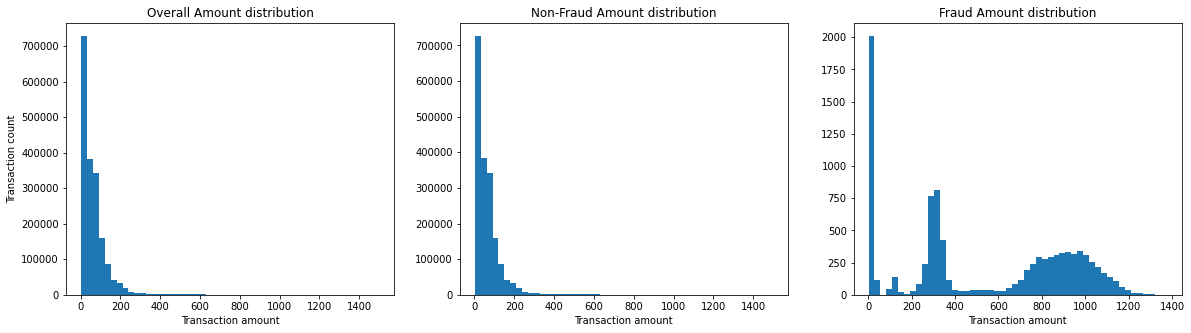

In [37]:
# To Plot histogram for fraud and non-fraud amount in dataframe 
fig,ax=plt.subplots(1,3,figsize=(20,5))

ax[0].hist(df[df['amt']<=1500]['amt'],bins=50)
ax[1].hist(df[(df['is_fraud']==0) & (df['amt']<=1500)]['amt'],bins=50)
ax[2].hist(df[(df['is_fraud']==1) & (df['amt']<=1500)]['amt'],bins=50)

ax[0].set_title('Overall Amount distribution')
ax[1].set_title('Non-Fraud Amount distribution')
ax[2].set_title('Fraud Amount distribution')

ax[0].set_xlabel('Transaction amount')
ax[0].set_ylabel('Transaction count')
ax[1].set_xlabel('Transaction amount')
ax[2].set_xlabel('Transaction amount')

Observation:
1.  In general, High amount trnsactions were Non-fraud.  But for amount of transaction amount upto 1500 , there were more fraud transaction in range of 600 to 1200 . 
2. For Fraudlent transaction, there were maximum no of transactions, in range of 0 to 200 (within limit of 1500)

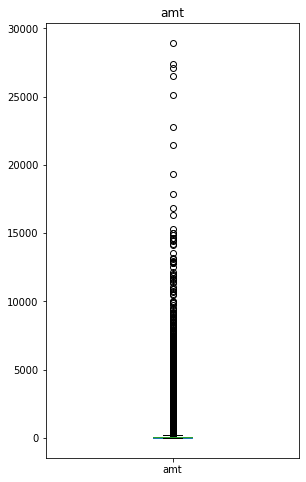

In [38]:
#To plot Box plot to identify if any significant Outliers presen in dataset
plt.figure(figsize=[10,8])
num_cols=['amt']
for ind,col in enumerate(num_cols):
  plt.subplot(1,2,ind+1)
  df[col].plot.box()
  plt.title(col)
plt.show()

Observation:
1. Larger no of transactions amount fall under range of 15000.
3. There can also be seen few transaction amounts in higher limit above: 25000. 

In [39]:
#To display the dataframe with first 5 rows
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.0


In [40]:
#To calculate Number of overalltransactions occured on Monthly basis.
df_timeline01=df.groupby(df['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline01.columns=['year_month','no_of_transactions','customer']
df_timeline01

,year_month,no_of_transactions,customer
0,2019-01,52525,913
1,2019-02,49866,918
2,2019-03,70939,916
3,2019-04,68078,913
4,2019-05,72532,910
5,2019-06,86064,908
6,2019-07,86596,910
7,2019-08,87359,911
8,2019-09,70652,913
9,2019-10,68758,912


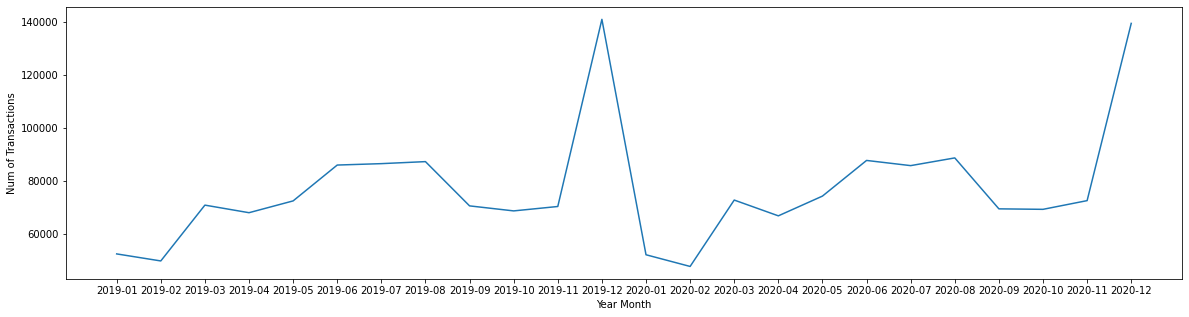

In [41]:
#To plot Line chart to display number of transactions on monthly basis
x=np.arange(0,len(df_timeline01),1)
fig,ax=plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['no_of_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()

Observation:
1. Overall,as we can observe that the maximum number of transactions were in December Month for year 2019 and 2020.
2. Least number of transaction count can be observed in February month for year 2019 and 2020.

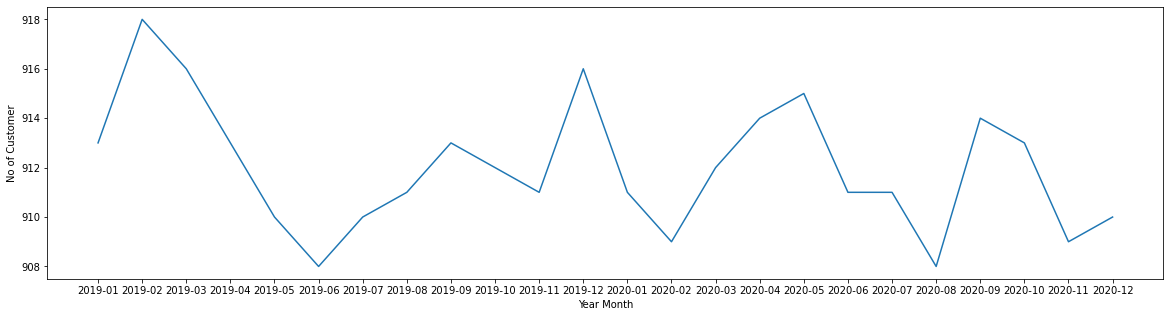

In [42]:
#To plot Line chart to display number of Customers used credit card on monthly basis
x=np.arange(0,len(df_timeline01),1)
fig,ax=plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['customer'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('No of Customer')
plt.show()

Observation:
1.  Customer count for Credit Card was recorded highest in Februray month,2019 
2.  Customer dont often use Credit card during months of June, 2019 and August,2020  with minimum count recorded visually.

In [43]:
#To calculate Number of Fraud transactions occured on Monthly basis.
df_fraud_transactions=df[df['is_fraud']==1]
df_timeline02=df_fraud_transactions.groupby(df_fraud_transactions['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline02.columns=['year_month','no_of_fraud_transactions','fraud_customers']
df_timeline02

,year_month,no_of_fraud_transactions,fraud_customers
0,2019-01,506,50
1,2019-02,517,53
2,2019-03,494,49
3,2019-04,376,41
4,2019-05,408,42
5,2019-06,354,35
6,2019-07,331,36
7,2019-08,382,39
8,2019-09,418,44
9,2019-10,454,50


In [44]:
#To calculate Average number of fruadlent transaction in a month
df_timeline02['no_of_fraud_transactions'].mean()

402.125

Text(0, 0.5, 'No of Fraud Transactions')

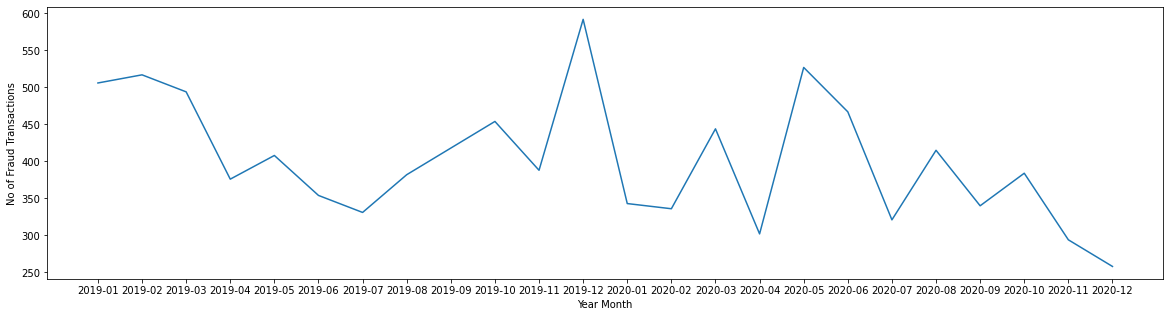

In [45]:
#To plot Line chart to display number of Fraud Transaction on monthly basis
x=np.arange(0,len(df_timeline02),1)

fig,ax=plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline02['no_of_fraud_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline02['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('No of Fraud Transactions')


Observation:
1. Highest no of Fraud Transactions were observed in December month,2019.
2. Least no of Fraud Trnsactions were observed in December month,2020.

In [46]:
#To identify the distribution of Gender for overall transactions
df_gender=df[['gender','trans_num']].groupby('gender').count().reset_index()
df_gender.columns=['gender','gender_count']
df_gender['percent']=(df_gender['gender_count']/df_gender['gender_count'].sum())*100
df_gender

,gender,gender_count,percent
0,F,1014749,54.780408
1,M,837645,45.219592


Observation:
1. Female Customers shop more and tend to make more online transactions using Credit Card rather than the Male Customers.

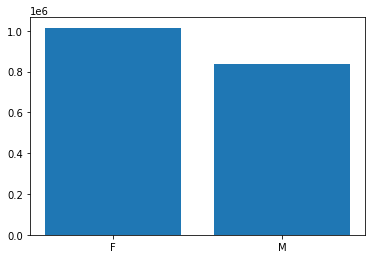

In [47]:
#To plot Bar chart to display Gender variations
plt.bar(df_gender['gender'],df_gender['gender_count'])
plt.show()

Observation:
1. There are more number of Female customers than Male customers.

In [48]:
# To identify distribution of Gender count for Fraud and non-fraud transactions.
df_fraud_gender=df[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns=['gender','is_fraud','count']
df_fraud_gender

,gender,is_fraud,count
0,F,0,1009850
1,F,1,4899
2,M,0,832893
3,M,1,4752


In [49]:
#Using Inner Join to combine both dataframes
df_fraud_gender=df_fraud_gender.merge(df_gender[['gender','gender_count']],how='inner')
df_fraud_gender

,gender,is_fraud,count,gender_count
0,F,0,1009850,1014749
1,F,1,4899,1014749
2,M,0,832893,837645
3,M,1,4752,837645


In [50]:
#To calculate percentage of male and females for fraud/non-fraud transactions. 
df_fraud_gender['percent_group']=(df_fraud_gender['count']/df_fraud_gender['gender_count'])*100
df_fraud_gender

,gender,is_fraud,count,gender_count,percent_group
0,F,0,1009850,1014749,99.517221
1,F,1,4899,1014749,0.482779
2,M,0,832893,837645,99.432695
3,M,1,4752,837645,0.567305


Observation:
1. 99% of Transactin made by both Male and Female wer Genuine i.e non-fraud.
2. Less than 1% of transactions by male and female were Fraud transactions.
3. It is a highly imbalnaced data set.

In [51]:
# Categorical variables

In [52]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.0


In [53]:
# To identfy distribution of Source Category for Transactions
df_category=df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns=['category','category_count']
df_category['percent']=(df_category['category_count']/df_category['category_count'].sum())*100
df_category.sort_values(by=['percent'],ascending=False)


,category,category_count,percent
2,gas_transport,188029,10.150594
4,grocery_pos,176191,9.511529
6,home,175460,9.472067
12,shopping_pos,166463,8.986371
7,kids_pets,161727,8.730702
11,shopping_net,139322,7.521186
0,entertainment,134118,7.240252
1,food_dining,130729,7.057300
10,personal_care,130085,7.022534
5,health_fitness,122553,6.615925


In [54]:
#To sort the result in desceding oder of count
df_category=df_category.sort_values(by=['percent'],ascending=False).reset_index()
df_category

,index,category,category_count,percent
0,2,gas_transport,188029,10.150594
1,4,grocery_pos,176191,9.511529
2,6,home,175460,9.472067
3,12,shopping_pos,166463,8.986371
4,7,kids_pets,161727,8.730702
5,11,shopping_net,139322,7.521186
6,0,entertainment,134118,7.240252
7,1,food_dining,130729,7.057300
8,10,personal_care,130085,7.022534
9,5,health_fitness,122553,6.615925


Observation:
1. Highest number of Transactions were made at the Gas Station, while for Travel purpose the  Credit card transactions were minimum.
2. Top 3 categories with more than 9% of overall transactions were at Sorce- 'Gas_Transport','Grocery_Pos' & 'Home' purpose.

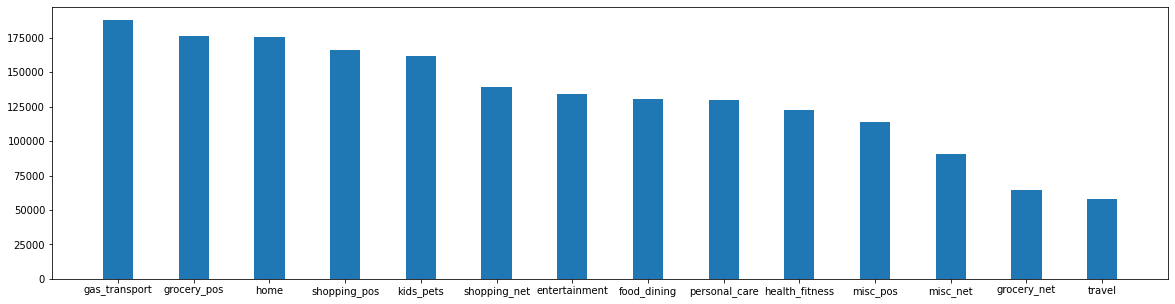

In [55]:
#To plot Bar chart to display Category distribution
plt.figure(figsize=(20,5))
plt.bar(df_category['category'],df_category['category_count'],width=0.4)
plt.show()

Observation:
1. Highest number of transaction was recorded at 'Gas_Transport', while minimum transaction frequency was for Travel purpose.

In [56]:
## To calculate count of Fraud and Non-fraud transactions for each Category
df_fraud_category=df[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns=['category','is_fraud','count']
df_fraud_category

,category,is_fraud,count
0,entertainment,0,133826
1,entertainment,1,292
2,food_dining,0,130524
3,food_dining,1,205
4,gas_transport,0,187257
5,gas_transport,1,772
6,grocery_net,0,64703
7,grocery_net,1,175
8,grocery_pos,0,173963
9,grocery_pos,1,2228


In [57]:
#Using Inner Join to combine both dataframes
df_fraud_category=df_fraud_category.merge(df_category[['category','category_count','percent']],how='inner')
df_fraud_category

,category,is_fraud,count,category_count,percent
0,entertainment,0,133826,134118,7.240252
1,entertainment,1,292,134118,7.240252
2,food_dining,0,130524,130729,7.057300
3,food_dining,1,205,130729,7.057300
4,gas_transport,0,187257,188029,10.150594
5,gas_transport,1,772,188029,10.150594
6,grocery_net,0,64703,64878,3.502387
7,grocery_net,1,175,64878,3.502387
8,grocery_pos,0,173963,176191,9.511529
9,grocery_pos,1,2228,176191,9.511529


In [58]:
#To calculate percentage of Fraudlent and Genuine transactions under each Category
df_fraud_category['percent_grp']=(df_fraud_category['count']/df_fraud_category['category_count'])*100
df_fraud_category

,category,is_fraud,count,category_count,percent,percent_grp
0,entertainment,0,133826,134118,7.240252,99.782281
1,entertainment,1,292,134118,7.240252,0.217719
2,food_dining,0,130524,130729,7.057300,99.843187
3,food_dining,1,205,130729,7.057300,0.156813
4,gas_transport,0,187257,188029,10.150594,99.589425
5,gas_transport,1,772,188029,10.150594,0.410575
6,grocery_net,0,64703,64878,3.502387,99.730263
7,grocery_net,1,175,64878,3.502387,0.269737
8,grocery_pos,0,173963,176191,9.511529,98.735463
9,grocery_pos,1,2228,176191,9.511529,1.264537


In [59]:
#Sort the result in Descending order of Category count
df_fraud_category.sort_values(by=['category_count'],ascending=False)

,category,is_fraud,count,category_count,percent,percent_grp
4,gas_transport,0,187257,188029,10.150594,99.589425
5,gas_transport,1,772,188029,10.150594,0.410575
8,grocery_pos,0,173963,176191,9.511529,98.735463
9,grocery_pos,1,2228,176191,9.511529,1.264537
13,home,1,265,175460,9.472067,0.151032
12,home,0,175195,175460,9.472067,99.848968
25,shopping_pos,1,1056,166463,8.986371,0.634375
24,shopping_pos,0,165407,166463,8.986371,99.365625
14,kids_pets,0,161423,161727,8.730702,99.812029
15,kids_pets,1,304,161727,8.730702,0.187971


Observation:
1. 'gas_transport' and 'grocery_pos' category have the highest number of transactions overall, while travel category being the lowest.

In [60]:
#To identify Top categories for Fraudlent transaction
df_fraud=df_fraud_category[df_fraud_category['is_fraud']==1].sort_values(by=['percent_grp'])
df_fraud

,category,is_fraud,count,category_count,percent,percent_grp
11,health_fitness,1,185,122553,6.615925,0.150955
13,home,1,265,175460,9.472067,0.151032
3,food_dining,1,205,130729,7.057300,0.156813
15,kids_pets,1,304,161727,8.730702,0.187971
1,entertainment,1,292,134118,7.240252,0.217719
21,personal_care,1,290,130085,7.022534,0.222931
27,travel,1,156,57956,3.128708,0.269170
7,grocery_net,1,175,64878,3.502387,0.269737
19,misc_pos,1,322,114229,6.166561,0.281890
5,gas_transport,1,772,188029,10.150594,0.410575


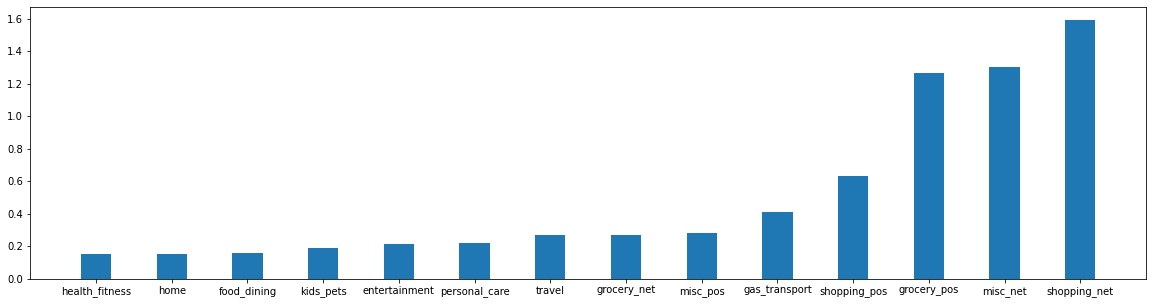

In [61]:
#To plot Bar chart for Fraud transaction categories
plt.figure(figsize=(20,5))
plt.bar(df_fraud['category'],df_fraud['percent_grp'],width=0.4)
plt.show()

Observation:
1.  'Shopping_net' category is having the maximum count of Fraud transaction, while the 'health_fitness' category have recorded least no of fraud transactions.
2.  Top 3 categories whihc company should focus to readuced fraudlent transactions are 'shopping_net', 'misc_net' & 'grocery_pos'.

In [62]:
#To check the distinct type of Mechants and finding most popular
df.merchant.value_counts(normalize=True,ascending =False)

fraud_Kilback LLC                              0.003380
fraud_Cormier LLC                              0.002832
fraud_Schumm PLC                               0.002804
fraud_Kuhn LLC                                 0.002716
fraud_Boyer PLC                                0.002699
fraud_Dickinson Ltd                            0.002674
fraud_Emard Inc                                0.002088
fraud_Cummerata-Jones                          0.002084
fraud_Corwin-Collins                           0.002080
fraud_Rodriguez Group                          0.002075
fraud_Kling Inc                                0.002074
fraud_Parisian and Sons                        0.002072
fraud_Erdman-Kertzmann                         0.002072
fraud_Huels-Hahn                               0.002070
fraud_Stroman, Hudson and Erdman               0.002067
fraud_Kutch LLC                                0.002067
fraud_Jenkins, Hauck and Friesen               0.002061
fraud_Prohaska-Murray                          0

In [63]:
#To idenitfy Number of Transactions made for each merchant
df_merchant=df[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant.columns=['merchant','merchant_count']
df_merchant

,merchant,merchant_count
0,fraud_Abbott-Rogahn,2647
1,fraud_Abbott-Steuber,2529
2,fraud_Abernathy and Sons,2513
3,fraud_Abshire PLC,2733
4,"fraud_Adams, Kovacek and Kuhlman",1354
5,fraud_Adams-Barrows,2535
6,"fraud_Altenwerth, Cartwright and Koss",2755
7,fraud_Altenwerth-Kilback,3594
8,fraud_Ankunding LLC,2782
9,fraud_Ankunding-Carroll,1155


In [64]:
#To calculate the Overall Percentage of transactions accepted by each merchant 
df_merchant['percent']=(df_merchant['merchant_count']/df_merchant['merchant_count'].sum())*100

In [65]:
#To display Top 5 merchants having highest no of transactions.
df_merchant.sort_values(by='percent',ascending=False).head()

,merchant,merchant_count,percent
316,fraud_Kilback LLC,6262,0.338049
105,fraud_Cormier LLC,5246,0.283201
571,fraud_Schumm PLC,5195,0.280448
349,fraud_Kuhn LLC,5031,0.271594
70,fraud_Boyer PLC,4999,0.269867


In [66]:
#To display Bottom 5 merchants having least no of transactions.
df_merchant.sort_values(by='percent',ascending=False).tail()

,merchant,merchant_count,percent
143,"fraud_Douglas, DuBuque and McKenzie",1101,0.059437
633,fraud_Treutel-King,1098,0.059275
544,fraud_Satterfield-Lowe,1095,0.059113
221,"fraud_Hahn, Douglas and Schowalter",1091,0.058897
516,"fraud_Ritchie, Bradtke and Stiedemann",1090,0.058843


Observation:
1. Overall, highest number of transaction including Genuine and fraud were made for 'fraud_Kilback LLC' merchant.
2. Overall, least number of transaction including Genuine and fraud were made for 'fraud_Ritchie, Bradtke and Stiedemann' merchant.


In [67]:
#To check Distribution of Transactions for each merchant
df_fraud_merchant=df[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns=['merchant','is_fraud','count']
df_fraud_merchant.head()

,merchant,is_fraud,count
0,fraud_Abbott-Rogahn,0,2643
1,fraud_Abbott-Rogahn,1,4
2,fraud_Abbott-Steuber,0,2521
3,fraud_Abbott-Steuber,1,8
4,fraud_Abernathy and Sons,0,2509


In [68]:
#To Join data frames
df_fraud_merchant=df_fraud_merchant.merge(df_merchant[['merchant','merchant_count','percent']],how='inner')
df_fraud_merchant

,merchant,is_fraud,count,merchant_count,percent
0,fraud_Abbott-Rogahn,0,2643,2647,0.142896
1,fraud_Abbott-Rogahn,1,4,2647,0.142896
2,fraud_Abbott-Steuber,0,2521,2529,0.136526
3,fraud_Abbott-Steuber,1,8,2529,0.136526
4,fraud_Abernathy and Sons,0,2509,2513,0.135662
...,...,...,...,...,...
1373,fraud_Ziemann-Waters,1,10,2438,0.131613
1374,"fraud_Zieme, Bode and Dooley",0,3710,3720,0.200821
1375,"fraud_Zieme, Bode and Dooley",1,10,3720,0.200821
1376,fraud_Zulauf LLC,0,2601,2605,0.140629


In [69]:
#To calculate percentage of Fraud  transactions for each merchant
df_fraud_merchant['percent_grp']=(df_fraud_merchant['count']/df_fraud_merchant['merchant_count'])*100
df_fraud_merchant.head()

,merchant,is_fraud,count,merchant_count,percent,percent_grp
0,fraud_Abbott-Rogahn,0,2643,2647,0.142896,99.848886
1,fraud_Abbott-Rogahn,1,4,2647,0.142896,0.151114
2,fraud_Abbott-Steuber,0,2521,2529,0.136526,99.683669
3,fraud_Abbott-Steuber,1,8,2529,0.136526,0.316331
4,fraud_Abernathy and Sons,0,2509,2513,0.135662,99.840828


In [70]:
#To display the Top 5 merhants with highest no of Fraud Transactions
df_fraud_merchant[df_fraud_merchant['is_fraud']==1].sort_values(by=['percent_grp'],ascending=False).head()

,merchant,is_fraud,count,merchant_count,percent,percent_grp
673,fraud_Kozey-Boehm,1,60,2758,0.148888,2.175489
490,"fraud_Herman, Treutel and Dickens",1,38,1870,0.100950,2.032086
1226,fraud_Terry-Huel,1,56,2864,0.154611,1.955307
607,fraud_Kerluke-Abshire,1,50,2635,0.142248,1.897533
884,"fraud_Mosciski, Ziemann and Farrell",1,53,2821,0.152289,1.878766


Observation:
1.  Merchant 'fraud_Kozey-Boehm' have been the most unsafe  and with highest percentage of Fraudlent transaction.


In [71]:
# To perform One Hot Enconding for significant catageorical variables in dataset
category_onehot=pd.get_dummies(df.category,prefix='category',drop_first=True)
gender_onehot=pd.get_dummies(df.gender,prefix='gender',drop_first=True)
day_of_week_onehot=pd.get_dummies(df.day_of_week,prefix='week',drop_first=True)

In [72]:
#Concatenating the datasets in single dataframe
df1=pd.concat([df,category_onehot,gender_onehot,day_of_week_onehot],axis=1)
df1.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [73]:
#To display list of columns in dataframe
df1.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_hour', 'day_of_week', 'year_month',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M', 'week_Monday', 'week_Saturday', 'week_Sunday',
       'week_Thursday', 'week_Tuesday', 'week_Wednesday'],
      dtype='object')

In [74]:
#To check Data types of each column in dataset
df1.dtypes

trans_date_trans_time      datetime64[ns]
cc_num                              int64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
trans_hour                          int64
day_of_week                       

In [75]:
#To calculate the distance between User location and mearcant Transaction based location
def distance_cal(lat1,long1,lat2,long2,to_radian=True, earth_radius=6371):

  if to_radian:
    lat1,long1,lat2,long2=np.radians([lat1,long1,lat2,long2])

  a = np.sin((lat2-lat1)/2.0)**2 + \
  np.cos(lat1) * np.cos(lat2) * np.sin((long2-long1)/2.0)**2

  return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [76]:
df1['dist']=distance_cal(df1['lat'],df1['long'],df1['merch_lat'],df1['merch_long'])
df1['dist'].describe()

count    1.852394e+06
mean     7.611173e+01
std      2.911697e+01
min      2.225452e-02
25%      5.532009e+01
50%      7.821638e+01
75%      9.850947e+01
max      1.521172e+02
Name: dist, dtype: float64

In [77]:
#To convert transaction date into data time format
df1.index=pd.to_datetime(df1['trans_date_trans_time'])
df1.rename_axis(index={'trans_date_trans_time':'time_index'})
df1=df1.sort_index()
df1.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,dist
trans_date_trans_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:18,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,78.597568
2019-01-01 00:00:44,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30.212176
2019-01-01 00:00:51,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,108.206083
2019-01-01 00:01:16,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,95.673231
2019-01-01 00:03:06,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,77.556744


In [78]:
#Last 60 days transaction by Customer
df1['value_for_agg']=1

In [79]:
#To check transaction for 60 last days for credit card number.
df_hist_trans_60d=df1.groupby(['cc_num'])['value_for_agg'].rolling('60D').count().shift().reset_index().fillna(0)
df_hist_trans_60d.columns=['cc_num','trans_date','hist_trans_60d']

In [80]:
#To display last 60 days transaction
df_hist_trans_60d.head(10)

,cc_num,trans_date,hist_trans_60d
0,60416207185,2019-01-01 12:47:15,0.0
1,60416207185,2019-01-02 08:44:57,1.0
2,60416207185,2019-01-02 08:47:36,2.0
3,60416207185,2019-01-02 12:38:14,3.0
4,60416207185,2019-01-02 13:10:46,4.0
5,60416207185,2019-01-03 13:56:35,5.0
6,60416207185,2019-01-03 17:05:10,6.0
7,60416207185,2019-01-04 13:59:55,7.0
8,60416207185,2019-01-04 21:17:22,8.0
9,60416207185,2019-01-05 00:42:24,9.0


In [81]:
#To convert transaction date into date  time format
df_hist_trans_60d['trans_date']=df_hist_trans_60d['trans_date'].dt.date

In [82]:
df_hist_trans_60d.head()

,cc_num,trans_date,hist_trans_60d
0,60416207185,2019-01-01,0.0
1,60416207185,2019-01-02,1.0
2,60416207185,2019-01-02,2.0
3,60416207185,2019-01-02,3.0
4,60416207185,2019-01-02,4.0


In [83]:
df_hist_trans_60d=df_hist_trans_60d.groupby(['cc_num','trans_date'])['hist_trans_60d'].min().reset_index()

In [84]:
df_hist_trans_60d.head()

,cc_num,trans_date,hist_trans_60d
0,60416207185,2019-01-01,0.0
1,60416207185,2019-01-02,1.0
2,60416207185,2019-01-03,5.0
3,60416207185,2019-01-04,7.0
4,60416207185,2019-01-05,9.0


In [85]:
###24 hour order by Customer###
df_hist_orders_24h=df1.groupby(['cc_num'])['value_for_agg'].rolling('24H').count().shift().reset_index().fillna(0)
df_hist_orders_24h.columns=['cc_num','trans_date_trans_time','hist_trans_24h']

In [86]:
df_hist_orders_24h.head()

,cc_num,trans_date_trans_time,hist_trans_24h
0,60416207185,2019-01-01 12:47:15,0.0
1,60416207185,2019-01-02 08:44:57,1.0
2,60416207185,2019-01-02 08:47:36,2.0
3,60416207185,2019-01-02 12:38:14,3.0
4,60416207185,2019-01-02 13:10:46,4.0


In [87]:
#To calculate last 24 hours transaction data
df_hist_fraud_trans_24h=df1[df1['is_fraud']==1].groupby(['cc_num'])['value_for_agg'].rolling('24H').count().shift().reset_index().fillna(0)
df_hist_fraud_trans_24h.columns=['cc_num','trans_date_trans_time','hist_fraud_trans_24h']

In [88]:
df_hist_fraud_trans_24h.head()

,cc_num,trans_date_trans_time,hist_fraud_trans_24h
0,60416207185,2019-03-01 01:32:53,0.0
1,60416207185,2019-03-01 02:42:25,1.0
2,60416207185,2019-03-01 23:06:58,2.0
3,60416207185,2019-03-02 22:10:38,3.0
4,60416207185,2019-03-02 22:10:59,2.0


In [89]:
#To claulate last 2 hours transaction data
df_hist_fraud_trans_2h=df1[df1['is_fraud']==1].groupby(['cc_num'])['value_for_agg'].rolling('2H').count().shift().reset_index().fillna(0)
df_hist_fraud_trans_2h.columns=['cc_num','trans_date_trans_time','hist_fraud_trans_2h']

In [90]:
df_hist_fraud_trans_2h.head()

,cc_num,trans_date_trans_time,hist_fraud_trans_2h
0,60416207185,2019-03-01 01:32:53,0.0
1,60416207185,2019-03-01 02:42:25,1.0
2,60416207185,2019-03-01 23:06:58,2.0
3,60416207185,2019-03-02 22:10:38,1.0
4,60416207185,2019-03-02 22:10:59,1.0


In [91]:
#To calculate average order amount  in last 60 days by Customer
df_hist_trans_amt_avg_60d=df1.groupby(['cc_num'])['amt'].rolling('60D').mean().shift().reset_index().fillna(0)
df_hist_trans_amt_avg_60d.columns=['cc_num','trans_date','hist_trans_amt_avg_60d']

In [92]:
df_hist_trans_amt_avg_60d['trans_date']=df_hist_trans_amt_avg_60d['trans_date'].dt.date
df_hist_trans_amt_avg_60d.head()

,cc_num,trans_date,hist_trans_amt_avg_60d
0,60416207185,2019-01-01,0.000
1,60416207185,2019-01-02,7.270
2,60416207185,2019-01-02,30.105
3,60416207185,2019-01-02,47.430
4,60416207185,2019-01-02,44.270


In [93]:
df_hist_trans_amt_avg_60d=df_hist_trans_amt_avg_60d.groupby(['cc_num','trans_date'])['hist_trans_amt_avg_60d'].min().reset_index()

In [94]:
df_hist_trans_amt_avg_60d.head(10)

,cc_num,trans_date,hist_trans_amt_avg_60d
0,60416207185,2019-01-01,0.000000
1,60416207185,2019-01-02,7.270000
2,60416207185,2019-01-03,35.188333
3,60416207185,2019-01-04,31.365714
4,60416207185,2019-01-05,40.378889
5,60416207185,2019-01-06,43.053636
6,60416207185,2019-01-07,48.005000
7,60416207185,2019-01-08,60.016154
8,60416207185,2019-01-09,70.423125
9,60416207185,2019-01-10,69.753889


In [95]:
df1['trans_date']=df1['trans_date_trans_time'].dt.date

In [96]:
#Joing data sets in single dataframe
df2=df1.merge(df_hist_trans_60d,left_on=['cc_num','trans_date'],right_on=['cc_num','trans_date'],how='left')

In [97]:
df2.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,dist,value_for_agg,trans_date,hist_trans_60d
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,78.597568,1,2019-01-01,1.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30.212176,1,2019-01-01,1.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,108.206083,1,2019-01-01,8.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,95.673231,1,2019-01-01,1.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,77.556744,1,2019-01-01,1.0


In [98]:
df2=df2.merge(df_hist_orders_24h,left_on=['cc_num','trans_date_trans_time'],right_on=['cc_num','trans_date_trans_time'],how='left')
df2.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,dist,value_for_agg,trans_date,hist_trans_60d,hist_trans_24h
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,78.597568,1,2019-01-01,1.0,6.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30.212176,1,2019-01-01,1.0,1.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,108.206083,1,2019-01-01,8.0,5.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,95.673231,1,2019-01-01,1.0,5.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,77.556744,1,2019-01-01,1.0,6.0


In [99]:
#Combinining results of last 24hr,last 2 hours and last 60 days order amount in single data frame
df2=df2.merge(df_hist_fraud_trans_24h,left_on=['cc_num','trans_date_trans_time'],right_on=['cc_num','trans_date_trans_time'],how='left')

df2=df2.merge(df_hist_fraud_trans_2h,left_on=['cc_num','trans_date_trans_time'],right_on=['cc_num','trans_date_trans_time'],how='left')

df2=df2.merge(df_hist_trans_amt_avg_60d,left_on=['cc_num','trans_date'],right_on=['cc_num','trans_date'],how='left')

df2.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,dist,value_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_amt_avg_60d
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,78.597568,1,2019-01-01,1.0,6.0,NaN,NaN,4.970000
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30.212176,1,2019-01-01,1.0,1.0,NaN,NaN,47.488421
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,108.206083,1,2019-01-01,8.0,5.0,NaN,NaN,377.925000
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,95.673231,1,2019-01-01,1.0,5.0,NaN,NaN,45.000000
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,77.556744,1,2019-01-01,1.0,6.0,NaN,NaN,41.960000


In [100]:
# To replace NaN with 0 if present in below columns 
df2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_amt_avg_60d']]=df2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_amt_avg_60d']].fillna(0)

In [101]:
df2['hist_fraud_trans_24h']=df2['hist_fraud_trans_24h']-df2['hist_fraud_trans_2h']

In [102]:
df2.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,dist,value_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_amt_avg_60d
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,78.597568,1,2019-01-01,1.0,6.0,0.0,0.0,4.970000
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30.212176,1,2019-01-01,1.0,1.0,0.0,0.0,47.488421
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,108.206083,1,2019-01-01,8.0,5.0,0.0,0.0,377.925000
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,95.673231,1,2019-01-01,1.0,5.0,0.0,0.0,45.000000
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,77.556744,1,2019-01-01,1.0,6.0,0.0,0.0,41.960000


In [103]:
#To create list of columns used for next steps
cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','dist','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_amt_avg_60d','is_fraud']

In [104]:
df2[cols].head()

,amt,city_pop,trans_hour,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Tuesday,week_Wednesday,week_Thursday,week_Saturday,week_Sunday,dist,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_trans_amt_avg_60d,is_fraud
0,4.97,3495,0,31.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,78.597568,1.0,6.0,0.0,4.970000,0
1,107.23,149,0,41.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,30.212176,1.0,1.0,0.0,47.488421,0
2,220.11,4154,0,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,108.206083,8.0,5.0,0.0,377.925000,0
3,45.00,1939,0,52.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,95.673231,1.0,5.0,0.0,45.000000,0
4,41.96,99,0,33.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,77.556744,1.0,6.0,0.0,41.960000,0


In [105]:
#To find correlation between the Target variable and other Encoded numercial varaibles.
corr=df2[cols].corr()

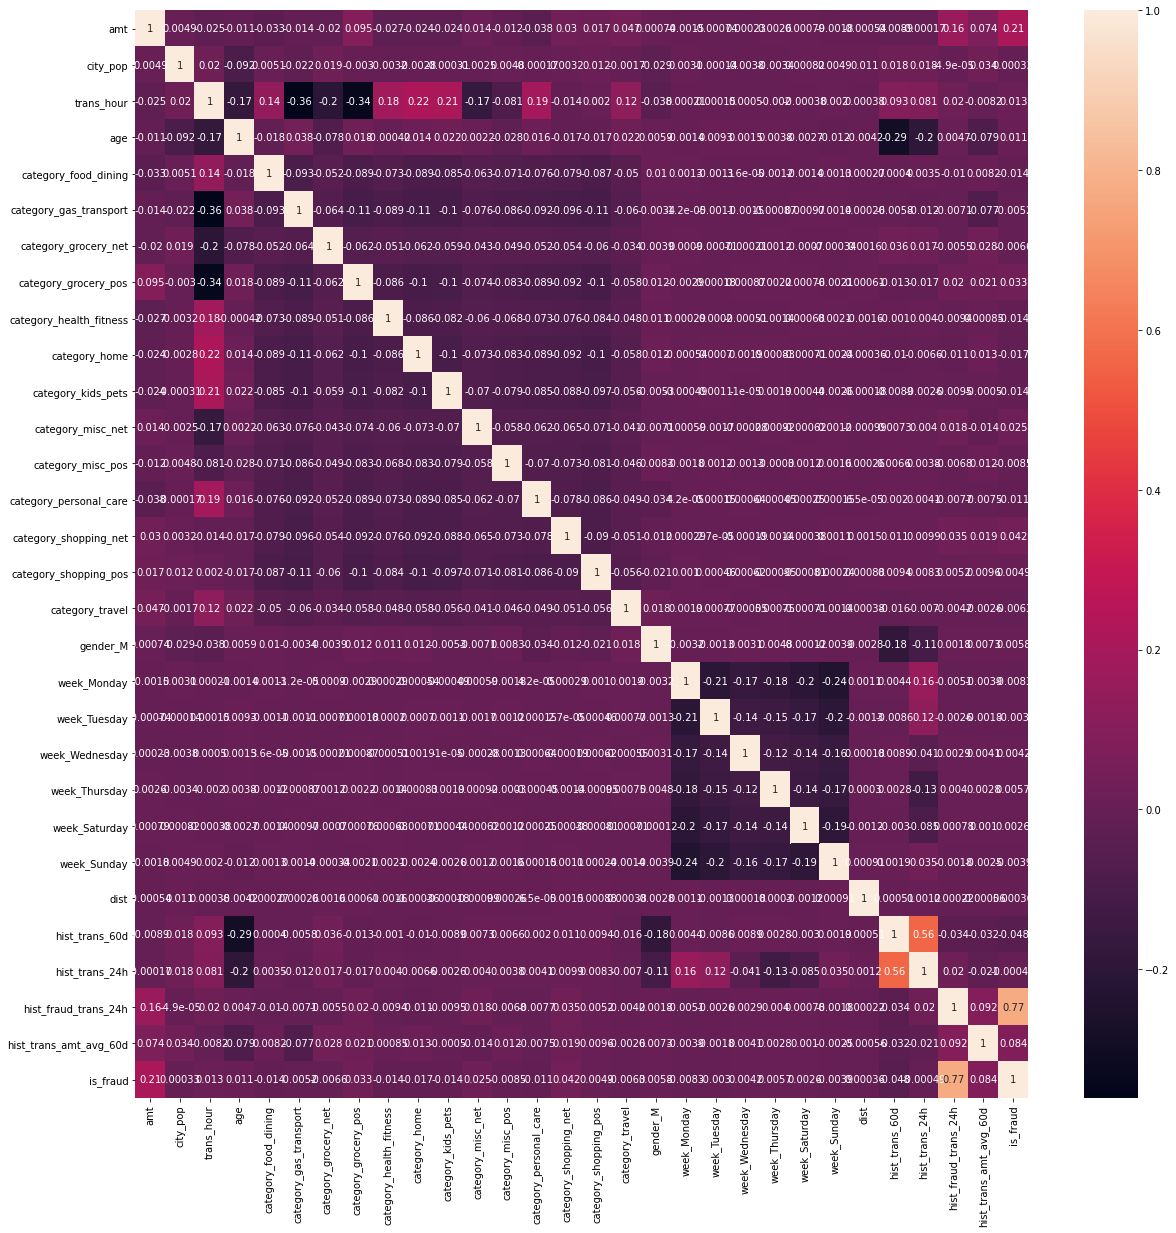

In [106]:
#To import seaborn visual library for  graphical display
import seaborn as sns
#To dispaly correlation between varaibles using Heat map
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.show()

Observation:
1.  There is high postive correlation between 'hist_trans_60d' and 'hist_trans_24h', whihc indicates if one variable increase, other would also increase.
2. There is high postive correlation between 'hist_fraud_trans_24h' and 'is_fraud' variable.

In [107]:
#To check number of transaction  for each Job type
df_job=df[['job','trans_num']].groupby(['job']).count().reset_index()
df_job.columns=['Job','tran_count_by_job']

# To calculate Overall percentage of Transactions for each Job type in descending order
df_job['percent']=(df_job['tran_count_by_job']/df_job['tran_count_by_job'].sum())*100
df_job.sort_values(by=['percent'],ascending=False)

,Job,tran_count_by_job,percent
194,Film/video editor,13898,0.750272
188,Exhibition designer,13167,0.710810
442,"Surveyor, land/geomatics",12436,0.671347
309,Naval architect,12434,0.671239
287,Materials engineer,11711,0.632209
121,"Designer, ceramics/pottery",11688,0.630967
179,Environmental consultant,10974,0.592423
195,Financial adviser,10963,0.591829
447,Systems developer,10962,0.591775
240,IT trainer,10943,0.590749


In [108]:
#To check the count of fraud and non-fraud transactions for each Job type
df_fraud_job=df[['job','is_fraud','trans_num']].groupby(['job','is_fraud']).count().reset_index()
df_fraud_job.columns=['Job','is_fraud','count']
#To calculate the percentage of Fraudelent transactions foreach Job type
df_fraud_job=df_fraud_job.merge(df_job[['Job','tran_count_by_job','percent']] ,how='inner',left_on='Job',right_on='Job')
df_fraud_job['percent_grp']=(df_fraud_job['count']/df_fraud_job['tran_count_by_job'])*100


In [109]:
#Sort the result in descending order of transaction count
job_plt_data=df_fraud_job.sort_values(by=['tran_count_by_job'],ascending=False).head(10)

In [110]:
#To display Top 5 Job types based on count of transactions.
job_plt_data

,Job,is_fraud,count,tran_count_by_job,percent,percent_grp
378,Film/video editor,1,52,13898,0.750272,0.374155
377,Film/video editor,0,13846,13898,0.750272,99.625845
366,Exhibition designer,1,51,13167,0.710810,0.387332
365,Exhibition designer,0,13116,13167,0.710810,99.612668
861,"Surveyor, land/geomatics",0,12386,12436,0.671347,99.597941
862,"Surveyor, land/geomatics",1,50,12436,0.671347,0.402059
603,Naval architect,1,66,12434,0.671239,0.530803
602,Naval architect,0,12368,12434,0.671239,99.469197
559,Materials engineer,1,62,11711,0.632209,0.529417
558,Materials engineer,0,11649,11711,0.632209,99.470583


In [111]:
job_plt_data['label']='Not Fraud'
job_plt_data.loc[job_plt_data['is_fraud']==1,['label']]='Fraud'
job_plt_data

,Job,is_fraud,count,tran_count_by_job,percent,percent_grp,label
378,Film/video editor,1,52,13898,0.750272,0.374155,Fraud
377,Film/video editor,0,13846,13898,0.750272,99.625845,Not Fraud
366,Exhibition designer,1,51,13167,0.710810,0.387332,Fraud
365,Exhibition designer,0,13116,13167,0.710810,99.612668,Not Fraud
861,"Surveyor, land/geomatics",0,12386,12436,0.671347,99.597941,Not Fraud
862,"Surveyor, land/geomatics",1,50,12436,0.671347,0.402059,Fraud
603,Naval architect,1,66,12434,0.671239,0.530803,Fraud
602,Naval architect,0,12368,12434,0.671239,99.469197,Not Fraud
559,Materials engineer,1,62,11711,0.632209,0.529417,Fraud
558,Materials engineer,0,11649,11711,0.632209,99.470583,Not Fraud


In [112]:
print(job_plt_data['Job'].unique())

['Film/video editor' 'Exhibition designer' 'Surveyor, land/geomatics'
 'Naval architect' 'Materials engineer']


In [113]:
job_plt_data

,Job,is_fraud,count,tran_count_by_job,percent,percent_grp,label
378,Film/video editor,1,52,13898,0.750272,0.374155,Fraud
377,Film/video editor,0,13846,13898,0.750272,99.625845,Not Fraud
366,Exhibition designer,1,51,13167,0.710810,0.387332,Fraud
365,Exhibition designer,0,13116,13167,0.710810,99.612668,Not Fraud
861,"Surveyor, land/geomatics",0,12386,12436,0.671347,99.597941,Not Fraud
862,"Surveyor, land/geomatics",1,50,12436,0.671347,0.402059,Fraud
603,Naval architect,1,66,12434,0.671239,0.530803,Fraud
602,Naval architect,0,12368,12434,0.671239,99.469197,Not Fraud
559,Materials engineer,1,62,11711,0.632209,0.529417,Fraud
558,Materials engineer,0,11649,11711,0.632209,99.470583,Not Fraud


Observation:
1.  Customers working in field of 'Film/video editor','Exhibition designer' 'Surveyor, land/geomatics','Naval architect' & 'Materials engineer' have had highest number of Fraud transactions.

In [114]:
#To create list of columns for Train-test split
X_cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','dist','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_amt_avg_60d']
y_cols=['is_fraud']

In [115]:
#Importing Library
from sklearn.model_selection import train_test_split

In [116]:
##Oversampling the data to mitigate Class Imbalance
cnt_non_fraud=df2[df2['is_fraud']==0]['amt'].count()
df2_class_nonfraud=df2[df2['is_fraud']==0]
df2_class_fraud=df2[df2['is_fraud']==1]

In [117]:
#To display first 5 rows of Non-fraud data frame
df2_class_nonfraud.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,dist,value_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_amt_avg_60d
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,78.597568,1,2019-01-01,1.0,6.0,0.0,0.0,4.970000
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30.212176,1,2019-01-01,1.0,1.0,0.0,0.0,47.488421
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,108.206083,1,2019-01-01,8.0,5.0,0.0,0.0,377.925000
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,95.673231,1,2019-01-01,1.0,5.0,0.0,0.0,45.000000
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,77.556744,1,2019-01-01,1.0,6.0,0.0,0.0,41.960000


In [118]:
#To display first 5 rows of Fraud data frame
df2_class_fraud.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,dist,value_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_amt_avg_60d
2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1,1,Wednesday,2019-01,30.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,68.953442,1,2019-01-02,1.0,1.0,4.0,1.0,71.03
2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1,1,Wednesday,2019-01,58.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,78.406096,1,2019-01-02,1.0,4.0,4.0,2.0,11.52
2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1,3,Wednesday,2019-01,58.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,41.012191,1,2019-01-02,1.0,1.0,0.0,1.0,11.52
2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1,3,Wednesday,2019-01,30.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,34.145794,1,2019-01-02,1.0,2.0,0.0,1.0,71.03
2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1,3,Wednesday,2019-01,58.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,44.209442,1,2019-01-02,1.0,2.0,0.0,2.0,11.52


In [119]:
#To check count of fraud and non fraud sample data points in Oversampled dataframe.
df2_class_fraud_oversample=df2_class_fraud.sample(cnt_non_fraud,replace=True)
df2_oversampled=pd.concat([df2_class_nonfraud,df2_class_fraud_oversample],axis=0)

print('random over-sampling')
print(df2_oversampled['is_fraud'].value_counts())

random over-sampling
1    1842831
0    1842831
Name: is_fraud, dtype: int64


Observation:
1. After oversampling the data, Fraud sample data point have been increased and are now equivalent to non-fraud sample data points in data set.

In [120]:
df2_oversampled.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,dist,value_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_amt_avg_60d
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,78.597568,1,2019-01-01,1.0,6.0,0.0,0.0,4.970000
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30.212176,1,2019-01-01,1.0,1.0,0.0,0.0,47.488421
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,108.206083,1,2019-01-01,8.0,5.0,0.0,0.0,377.925000
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,95.673231,1,2019-01-01,1.0,5.0,0.0,0.0,45.000000
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,77.556744,1,2019-01-01,1.0,6.0,0.0,0.0,41.960000


In [121]:
#To perform Train-test split in ration of 70:30
X_train,X_test,y_train,y_test=train_test_split(df2_oversampled[X_cols],df2_oversampled[y_cols],train_size=0.7,test_size=0.3,random_state=42)

In [122]:
#To check size of Train data set in terms of rows and columns
X_train.shape

(2579963, 29)

In [123]:
#To check size of Test data set in terms of rows and columns
X_test.shape

(1105699, 29)

In [124]:
#Logistic Regression Model

In [125]:
#Import library for Logistic regression 
from sklearn.linear_model import LogisticRegression

In [126]:
logreg=LogisticRegression(random_state=42)

In [127]:
#Fitting the data into LR model
model_lr=logreg.fit(X_train,y_train)

In [128]:
#Predicting data for train and test dataset
y_train_pred=logreg.predict(X_train)
y_test_pred=logreg.predict(X_test)

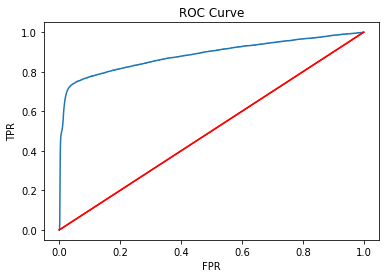

In [129]:
#ROC curve for LR model
from sklearn.metrics import roc_curve
prob = model_lr.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,prob)
#Plotting Roc Curve
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red',linestyle = '-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [130]:
#Import Library for Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [131]:
 #creating confusion matrix for Train data
 print(confusion_matrix(y_train,y_train_pred))

[[1199642   90366]
 [ 313753  976202]]


Observation:
1. Confusion Matrix shows stats shows high False Negative(FN) greater than 310000 and high False Positive(FP) greater than 110000. 
2. For a good model, FN and FP needs to be minimum.


In [132]:
 #creating classification report for Train data
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86   1290008
           1       0.92      0.76      0.83   1289955

    accuracy                           0.84   2579963
   macro avg       0.85      0.84      0.84   2579963
weighted avg       0.85      0.84      0.84   2579963



In [133]:
 #creating confusion matrix for Test data
print(confusion_matrix(y_test,y_test_pred))

[[514402  38421]
 [134463 418413]]


In [134]:
 #creating classification report for Test data
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86    552823
           1       0.92      0.76      0.83    552876

    accuracy                           0.84   1105699
   macro avg       0.85      0.84      0.84   1105699
weighted avg       0.85      0.84      0.84   1105699



Observation: Logistic regression model results
1. For Train Data, model is having Accuracy around 84-85% and Recall of 76%.
2. For Test Data, model is having Accuracy around 84-85% and Recall of 76%.

In [135]:
#Importing library for Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [136]:
#Training the Decision tree model on train data set
dt_clf=DecisionTreeClassifier(criterion='gini',max_depth=20,random_state=0)
model_dt=dt_clf.fit(X_train,y_train)

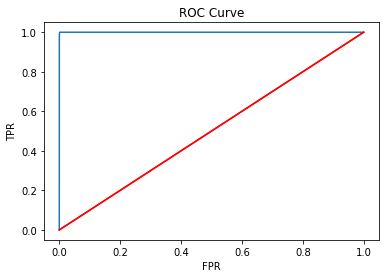

In [137]:
#Creating ROC curve for Decision tree model
prob = model_dt.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,prob)
#Plotting Roc Curve
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red',linestyle = '-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [138]:
#creating confusion matrix for Train data
print('Train results')
pred_train=dt_clf.predict(X_train)
print(confusion_matrix(y_train,pred_train))

Train results
[[1288957    1051]
 [      0 1289955]]


In [139]:
#creating classification resport for Train data
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1290008
           1       1.00      1.00      1.00   1289955

    accuracy                           1.00   2579963
   macro avg       1.00      1.00      1.00   2579963
weighted avg       1.00      1.00      1.00   2579963



In [140]:
#creating confusion matrix for Test data
print('Test results')
pred_test=dt_clf.predict(X_test)
print(confusion_matrix(y_test,pred_test))

Test results
[[552243    580]
 [     0 552876]]


In [141]:
#creating classification report for Test data
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552823
           1       1.00      1.00      1.00    552876

    accuracy                           1.00   1105699
   macro avg       1.00      1.00      1.00   1105699
weighted avg       1.00      1.00      1.00   1105699



Observation: Decision Tree model results
1. For Train Data, model is having Accuracy of 100% and Recall of 100%.
2. For Test Data, model is having Accuracy of 100% and Recall of 100%.

In [142]:
# Import Library for Random Forest Classifier

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [144]:
#Creating instance of Random Forest Classifier model
rf_clf=RandomForestClassifier(random_state=345)
param_grid={'n_estimators':[50],'max_depth':[8,16,20]}

In [145]:
## Grid Search Random Forest

In [146]:
#Training the Random Classifier model with Train dataset
rf_clf=RandomForestClassifier(n_estimators=50,max_depth=20,random_state=345,verbose=1)
model_rf=rf_clf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.3min finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    6.9s finished


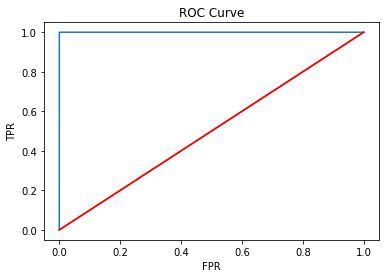

In [147]:
#Plotting Roc Curve
prob = model_rf.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,prob)
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red',linestyle = '-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [148]:
#creating confusion matrix for Train dataset
print("Train results")
pred_train=rf_clf.predict(X_train)
print(confusion_matrix(y_train,pred_train))


Train results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   15.7s finished


[[1289858     150]
 [      0 1289955]]


In [149]:
#creating classification report for Train dataset
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1290008
           1       1.00      1.00      1.00   1289955

    accuracy                           1.00   2579963
   macro avg       1.00      1.00      1.00   2579963
weighted avg       1.00      1.00      1.00   2579963



In [150]:
#creating confusion matrix for Test dataset
print("Test results")
pred_test=rf_clf.predict(X_test)
print(confusion_matrix(y_test,pred_test))

Test results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    6.9s finished


[[552714    109]
 [     0 552876]]


In [151]:
#creating classification report for Test dataset
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552823
           1       1.00      1.00      1.00    552876

    accuracy                           1.00   1105699
   macro avg       1.00      1.00      1.00   1105699
weighted avg       1.00      1.00      1.00   1105699



Observation:Random Forest results
1. For Train Data, model is having Accuracy of 100% and Recall of 100%.
2. For Test Data, model is having Accuracy of 100% and Recall of 100%.

In [152]:
#Gradient Boosting Tree

In [153]:
import sys
!{sys.executable} -m pip install xgboost

In [154]:
#Importing library for XGBoost Model
from xgboost import XGBClassifier
#Creating XGBoost Model
xbt_model=XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=345,verbose=1)
xbt_model.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=345,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbose=1, verbosity=1)

In [155]:
# Model Evaluation

In [156]:
#creating confusion matrix for Train dataset
pred_train=xbt_model.predict(X_train)
print(confusion_matrix(y_train,pred_train))

[[1281275    8733]
 [  27642 1262313]]


In [157]:
#creating classification report for Train dataset
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99   1290008
           1       0.99      0.98      0.99   1289955

    accuracy                           0.99   2579963
   macro avg       0.99      0.99      0.99   2579963
weighted avg       0.99      0.99      0.99   2579963



In [158]:
#creating confusion matrix for Test dataset
pred_test=xbt_model.predict(X_test)
print(confusion_matrix(y_test,pred_test))

[[549086   3737]
 [ 11911 540965]]


In [159]:
#creating classification report for Test dataset
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    552823
           1       0.99      0.98      0.99    552876

    accuracy                           0.99   1105699
   macro avg       0.99      0.99      0.99   1105699
weighted avg       0.99      0.99      0.99   1105699



Observation:  XGBoost Model results
1. For Train Data, model is having Accuracy of 99% and Recall of 98-99%.
2. For Test Data, model is having Accuracy of 99% and Recall of 98-99%.

Conclusion:
1. Decision Tree and Radom forest are the best models , as they have highest Recall.
2. In our case study, we need to have an Ideal model with as High recall.


Cost Benefit Analysis

In [160]:
#To check the distribution of Amount for overall transactions
df['amt'].describe(percentiles=[0.5,0.95,0.999]).reset_index().rename(columns={'index':'Row Type','amt':'Overall amount distribution'})

,Row Type,Overall amount distribution
0,count,1.852394e+06
1,mean,7.006357e+01
2,std,1.592540e+02
3,min,1.000000e+00
4,50%,4.745000e+01
5,95%,1.953400e+02
6,99.9%,1.517241e+03
7,max,2.894890e+04


In [161]:
#To check the distribution of Amount for Non fraudlent transactions
df.loc[df['is_fraud']==0,['amt']].describe(percentiles=[0.5,0.95,0.999]).reset_index(drop=1).rename(columns={'amt':'Non Fraud Amt distribution'})

,Non Fraud Amt distribution
0,1.842743e+06
1,6.765128e+01
2,1.535481e+02
3,1.000000e+00
4,4.724000e+01
5,1.895900e+02
6,1.519623e+03
7,2.894890e+04


In [162]:
#To check the distribution of Amount for Fraudlent transactions
df.loc[df['is_fraud']==1,['amt']].describe(percentiles=[0.5,0.95,0.999]).reset_index(drop=1).rename(columns={'amt':'Fraud Amt distribution'})

,Fraud Amt distribution
0,9651.000000
1,530.661412
2,391.028873
3,1.060000
4,390.000000
5,1084.090000
6,1293.127000
7,1376.040000


In [163]:
#Combining the result into single dataframe
pd.concat([df['amt'].describe(percentiles=[0.5,0.95,0.999]).reset_index().rename(columns={'index':'Row Type','amt':'Overall amount distribution'}),df.loc[df['is_fraud']==0,['amt']].describe(percentiles=[0.5,0.95,0.999]).reset_index(drop=1).rename(columns={'amt':'Non Fraud Amt distribution'}),df.loc[df['is_fraud']==1,['amt']].describe(percentiles=[0.5,0.95,0.999]).reset_index(drop=1).rename(columns={'amt':'Fraud Amt distribution'})],axis=1)

,Row Type,Overall amount distribution,Non Fraud Amt distribution,Fraud Amt distribution
0,count,1.852394e+06,1.842743e+06,9651.000000
1,mean,7.006357e+01,6.765128e+01,530.661412
2,std,1.592540e+02,1.535481e+02,391.028873
3,min,1.000000e+00,1.000000e+00,1.060000
4,50%,4.745000e+01,4.724000e+01,390.000000
5,95%,1.953400e+02,1.895900e+02,1084.090000
6,99.9%,1.517241e+03,1.519623e+03,1293.127000
7,max,2.894890e+04,2.894890e+04,1376.040000


In [164]:
#To calculate number of Fraud transactions for each month
df_timeline02

,year_month,no_of_fraud_transactions,fraud_customers
0,2019-01,506,50
1,2019-02,517,53
2,2019-03,494,49
3,2019-04,376,41
4,2019-05,408,42
5,2019-06,354,35
6,2019-07,331,36
7,2019-08,382,39
8,2019-09,418,44
9,2019-10,454,50


In [165]:
#To calculate average number of Fraud transactions per month
df_timeline02['no_of_fraud_transactions'].mean()

402.125

In [166]:
#To display number of transactions and customer count for each month
df_timeline01

,year_month,no_of_transactions,customer
0,2019-01,52525,913
1,2019-02,49866,918
2,2019-03,70939,916
3,2019-04,68078,913
4,2019-05,72532,910
5,2019-06,86064,908
6,2019-07,86596,910
7,2019-08,87359,911
8,2019-09,70652,913
9,2019-10,68758,912


In [167]:
# To calculate average number of Overall transactions(inclusing both genuine and fraud) per month
df_timeline01['no_of_transactions'].mean()

77183.08333333333

In [168]:
df_fraud=df[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index()
df_fraud.columns=['is_fraud','count']

In [169]:
#To calculate percentage of Fraud transactions in dataset
df_fraud['percentage']=(df_fraud['count']/df_fraud['count'].sum())*100
df_fraud

,is_fraud,count,percentage
0,0,1842743,99.478999
1,1,9651,0.521001


Observation:
1. Total number of Fraud transactions in data set were 9651, whihc is less than 1%. It indicates imabalnace in the dataset.
2.  On an average, there are around 402 frauds per month  in 2 years period.
3. Decision Tree model can be chosen as preferred model for problem Statement, as it have 100% recall. Here, False negative =0 means that all Fraudlent transactions were correctly predcited.

